# [9주차 코딩 실습](전처리 36. 강체 유사 변환)주어진 조건에 맞게 이미지를 변환하고 그 결과를 출력하세요

* 이미지의 (0,cols)점을 기준으로 45도 회전
* 300만큼 평행이동




In [1]:
# 이 코드를 먼저 실행하세요

import cv2
import skimage.data
import matplotlib.pyplot as plt
img_astro = skimage.data.astronaut()

In [2]:
img = cv2.cvtColor(img_astro, cv2.COLOR_BGR2GRAY)
rows, cols = img.shape[:2]

center = (0, cols)
angle = 45
scale = 1
# 이미지의 (0,cols)점을 기준으로 45도 회전
H = cv2.getRotationMatrix2D(center=center, angle=angle, scale=scale)

# 300만큼 평행이동
H[:, 2] += 300

array([[  0.70710678,   0.70710678, -62.03867197],
       [ -0.70710678,   0.70710678, 449.96132803]])

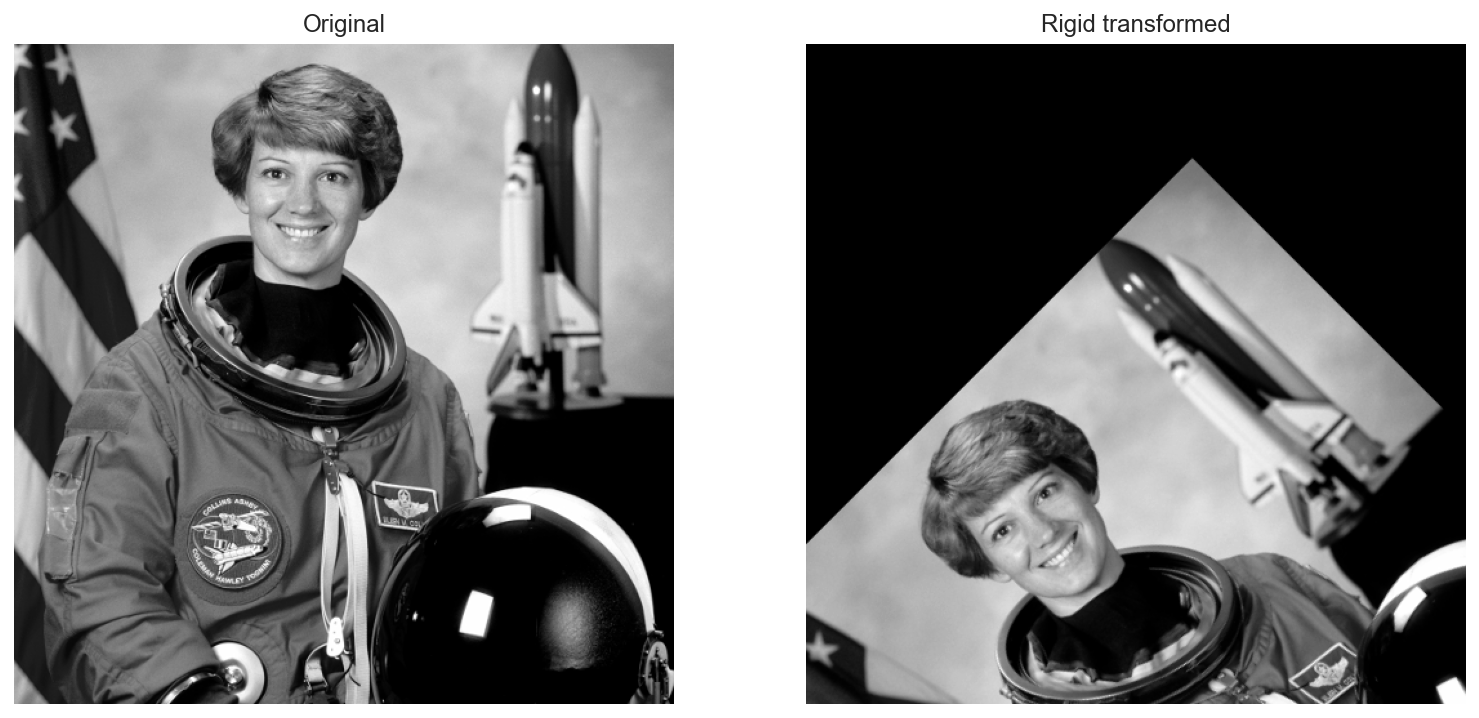

In [3]:
dst = cv2.warpAffine(img, H, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(13, 13))
ax1.set_title("Original")
ax1.axis("off")
ax1.imshow(img, cmap=plt.cm.gray)
ax2.set_title("Rigid transformed")
ax2.axis("off")
ax2.imshow(dst, cmap=plt.cm.gray)
plt.show()

### Quiz 9주차

In [5]:
from skimage.data import chelsea
import cv2
import matplotlib.pyplot as plt

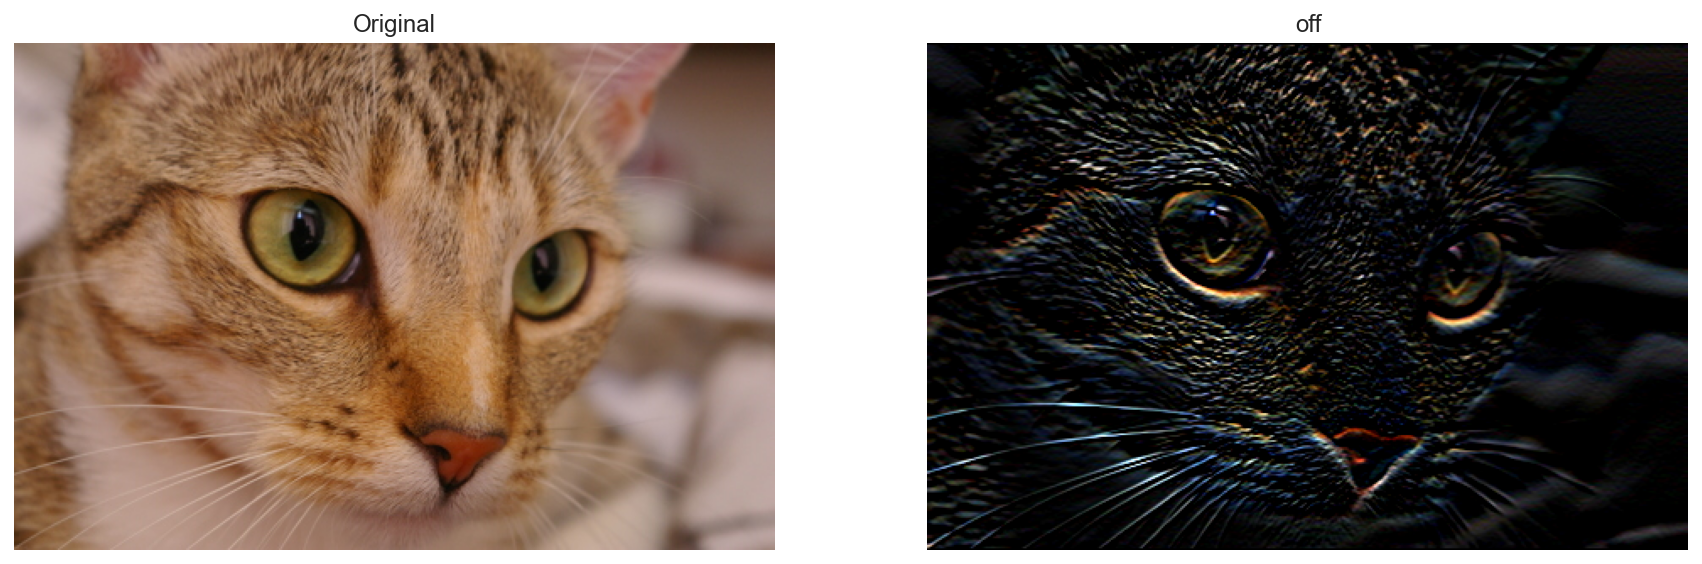

In [6]:
img = chelsea()

y = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=3)
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(y, cmap='gray')
plt.title('off')
plt.axis('off')
plt.show()

In [7]:
import cv2
from skimage.data import camera
import matplotlib.pyplot as plt

In [8]:
img = camera()

기준값:  10
nonmaxSuppression:  True
nonmaxSuppression 후처리 후, 추출된 전체 특징점:  3351


C:\Users\cindy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cindy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52286 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cindy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cindy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\cindy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52286 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\cindy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51008 missing from curre

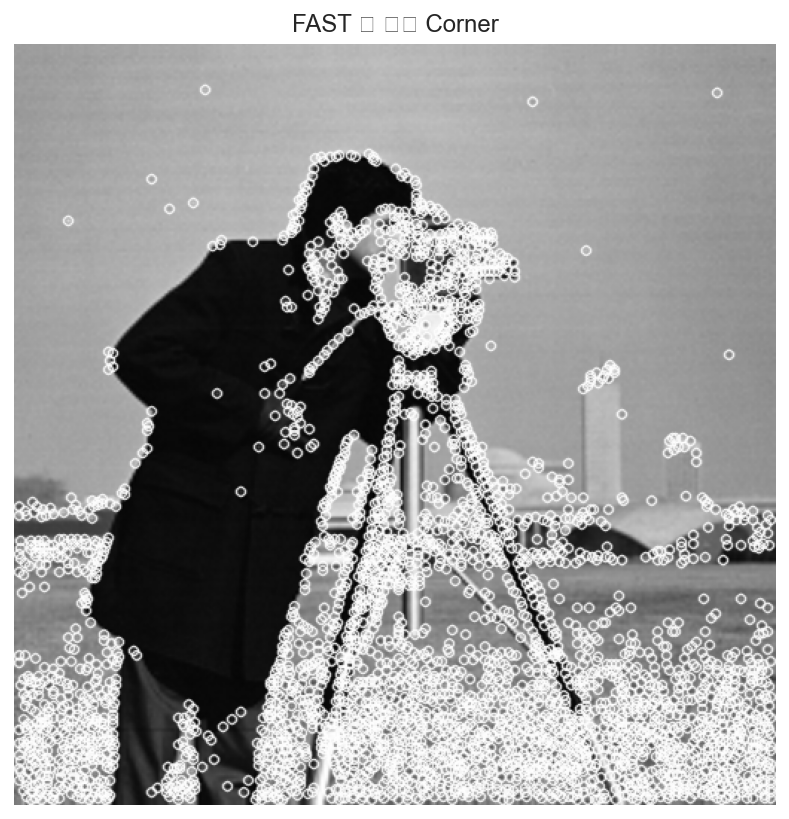

In [9]:
fast = cv2.FastFeatureDetector_create()
kps = fast.detect(img, None)
img2 = cv2.drawKeypoints(img, kps, img, color=(255, 255, 255))

print("기준값: ", fast.getThreshold())
print("nonmaxSuppression: ", fast.getNonmaxSuppression())
print("nonmaxSuppression 후처리 후, 추출된 전체 특징점: ", len(kps))
plt.figure(figsize=(7,7))
plt.imshow(img2, cmap='gray')
plt.title("FAST 로 찾은 Corner")
plt.axis("off")
plt.show()

In [11]:
import librosa
import librosa.display

D = np.abs(librosa.stft(y))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time')
plt.title('Dual Tone')
plt.ylim(0, 4000)
plt.show()

ParameterError: Audio data must be floating-point